In [1]:
import pandas as pd

In [6]:
df=pd.read_csv('C:/Users/user/Downloads/energydata_complete.csv')

In [7]:
# rename columns
colume_name={'T1':'Temperature in kitchen area ',

'RH_1':'Humidity in kitchen area' ,

'T2': 'Temperature in living room area', 

'RH_2': 'Humidity in living room area',

'T3': 'Temperature in laundry room area',

'RH_3':'Humidity in laundry room area',

'T4': 'Temperature in office room',

'RH_4': 'Humidity in office room',

'T5': 'Temperature in bathroom',

'RH_5': 'Humidity in bathroom', 

'T6': 'Temperature outside the building (north side)',

'RH_6': 'Humidity outside the building (north side)', 

'T7': 'Temperature in ironing room' , 

'RH_7': 'Humidity in ironing room', 

'T8': 'Temperature in teenager room 2, in Celsius',

'RH_8': 'Humidity in teenager room 2, in %',

'T9': 'Temperature in parents room, in Celsius',

'RH_9': 'Humidity in parents room, in %',

'To': 'Temperature outside (from Chievres weather station), in Celsius',

'RH_out': 'Humidity outside (from Chievres weather station), in %',

'rv1': 'Random variable 1, nondimensional',

'rv2': 'Random variable 2, nondimensional'}

In [8]:
df=df.rename(columns=colume_name)

In [9]:
#select a sample of the data set
simple_linear_reg_df = df[['Temperature outside the building (north side)', 'Temperature in living room area']]. sample(15, random_state=2)

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='Temperature in living room area', ylabel='Temperature outside the building (north side)'>

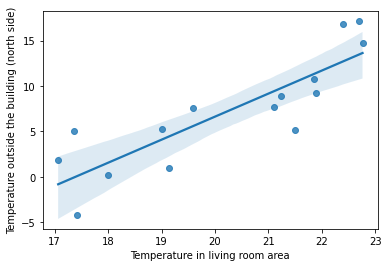

In [11]:
#regression plot
sns.regplot(x="Temperature in living room area", y="Temperature outside the building (north side)", data= simple_linear_reg_df)

In [27]:
#normalizing dataset to common scale using min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Temperature in living room area', 'Temperature outside the building (north side)'])
heating_target = normalised_df['Temperature outside the building (north side)']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)

In [29]:
from sklearn.linear_model import LinearRegression

In [34]:
#fitting model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.024

In [33]:
linear_model=LinearRegression()

In [35]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) 

5.874

In [36]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.031

In [37]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) 

0.968

In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [39]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [40]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.columns, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df


In [43]:
linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')


AttributeError: 'LinearRegression' object has no attribute 'columns'

In [42]:
model=linear_model